# LDA binary classification for synthetic data
taken from *Vincent Loibl* labwork

## Load and display 'synth_train' dataset

training set size n=100, feature size p=2


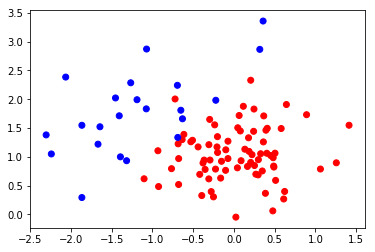

In [1]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt

# Warning: put the data files in the notebook directory
data = spio.loadmat("synth_train.mat")
Xtrain = data["Xtrain"]
Ytrain = data["Ytrain"]

# Warning: put the data files in the notebook directory
data = spio.loadmat("synth_test.mat")
Xtest = data["Xtest"]
Ytest = data["Ytest"]

(n,p) = Xtrain.shape
print("training set size n={}, feature size p={}".format(n,p))

# Cast target Y as 1D vector
Ytest = Ytest.ravel() 
Ytrain = Ytrain.ravel() 


color = ["b" if x==1 else "r" for x in Ytrain]
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=color)

## Compute LDA parameter estimators

In [2]:
# Get class parameters
n1 = sp.sum(Ytrain==1)
n2 = sp.sum(Ytrain==2)
print( (2*"number of class {} samples (training set) n{}={}\n").format(1,1,n1,2,2,n2) )

pik = [n1/n, n2/n]
print( (2* "class weight pi{}={}\n").format(1,pik[0],2,pik[1]) )

muk = [sp.mean(Xtrain[Ytrain==1],axis=0),
      sp.mean(Xtrain[Ytrain==2],axis=0) ]
print( (2* "class mean mu{}={}\n").format(1,muk[0],2,muk[1]) )


# Compute pooled covariance (see LDA assumption) estimator
Xcentered = [Xtrain[Ytrain==1]-muk[0],Xtrain[Ytrain==2]-muk[1]]

# @ for matrix multiplication 
SigmaHat = (1./(n-2))* ( Xcentered[0].T @ Xcentered[0] + Xcentered[1].T @ Xcentered[1] ) 

print("Pooled covariance estimator SigmaHat")
S_str = sp.array2string( SigmaHat, precision=3, separator=', ')
print(' ' + S_str[1:-1])

number of class 1 samples (training set) n1=22
number of class 2 samples (training set) n2=78

class weight pi1=0.22
class weight pi2=0.78

class mean mu1=[-1.18350693  1.78655437]
class mean mu2=[0.02868973 1.04424548]

Pooled covariance estimator SigmaHat
 [0.309, 0.085],
 [0.085, 0.276]


## Display LDA decision boundary

In [3]:
# parameter of the LDA decision boudary: here a simple line
C = sp.log(pik[0]/pik[1]) - 0.5* muk[0].T @ np.linalg.inv(SigmaHat) @ muk[0] + 0.5*muk[1].T @ np.linalg.inv(SigmaHat) @ muk[1]
print("Constant term C={}".format(C) )

L = np.linalg.inv(SigmaHat) @ (muk[0]-muk[1])
print("Linear term L={}".format(L) )

Constant term C=-10.21618942328174
Linear term L=[-5.08154836  4.25066671]


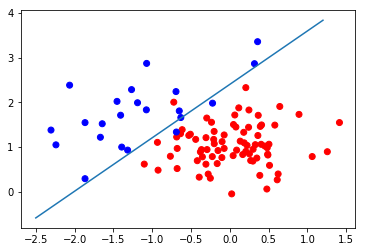

In [4]:
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=color)

def mfunc (x):
    return (-C - L[0]*x)/L[1]

plt.plot([-2.5,1.2],[mfunc(-2.5),mfunc(1.2)])

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score as OA

#built-in method from scikit 

model =LDA()
model.fit(Xtrain,Ytrain)

# performance on training set
y_pred = model.predict(Xtrain)
oa = OA(Ytrain, y_pred) # overall accuracy 
print("training misclassification error rate = {}".format(1-oa) )


# performance on test set: what matters!
y_pred = model.predict(Xtest)
oa = OA(Ytest, y_pred) # overall accuracy 
print("test misclassification error rate = {}".format(1-oa) )


training misclassification error rate = 0.030000000000000027
test misclassification error rate = 0.05500000000000005


## check decision boundary/classification rule to compare with own method

In [6]:
# constant term L
print(model.intercept_)
# linear term C
print(model.coef_)

[10.21618942]
[[ 5.08154836 -4.25066671]]
